<a href="https://colab.research.google.com/github/lijp16/lijp16/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt

###PyTorch Workflow
1. data(prepare and load)
2. build model
3. fitting model to data(training)
4. improve model with experimentation
5. making prediction and evaluating a model
6. saving and loading a model

In [15]:
torch.__version__

'2.4.1+cu121'

## 1. data preparing and loading

type
* text
* audio
* videos
* dna
* images
* excel sheets

ml in 2 parts:
1. get data into number
2. built model to find pattern


use linear regression

In [16]:
#create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
len(X),len(Y)

(50, 50)

In [18]:
# split data into training set, validation set(not always) and test set

train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

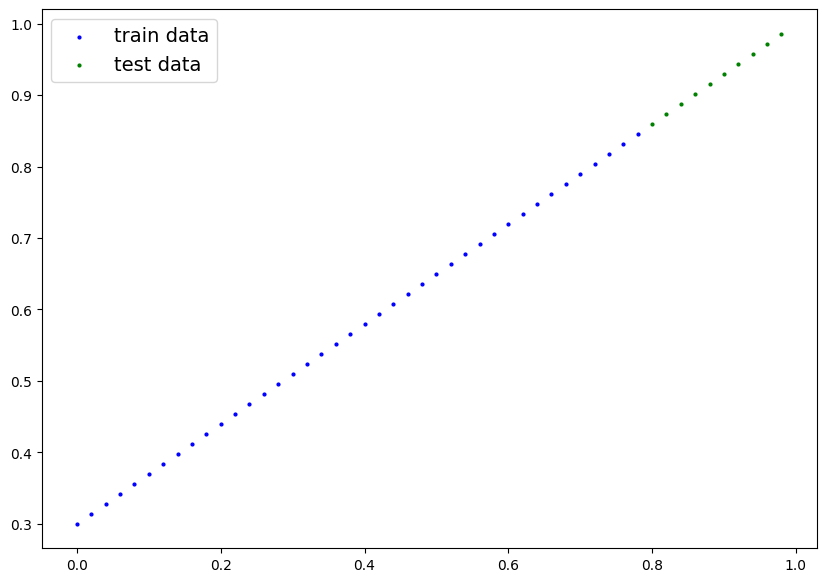

In [19]:
#visualize data

def plot_predictions(train_data = X_train,
                     train_lables = Y_train,
                     test_data = X_test,
                     test_lables = Y_test,
                     predictions = None):
  """
  Plots training data, test data and comepare predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_lables, c="b", s=4, label="train data")
  plt.scatter(test_data, test_lables, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14});

plot_predictions()

In [20]:
# bulid linear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [21]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [23]:
#making prediction using 'torch.inference_mode()'

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds,Y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

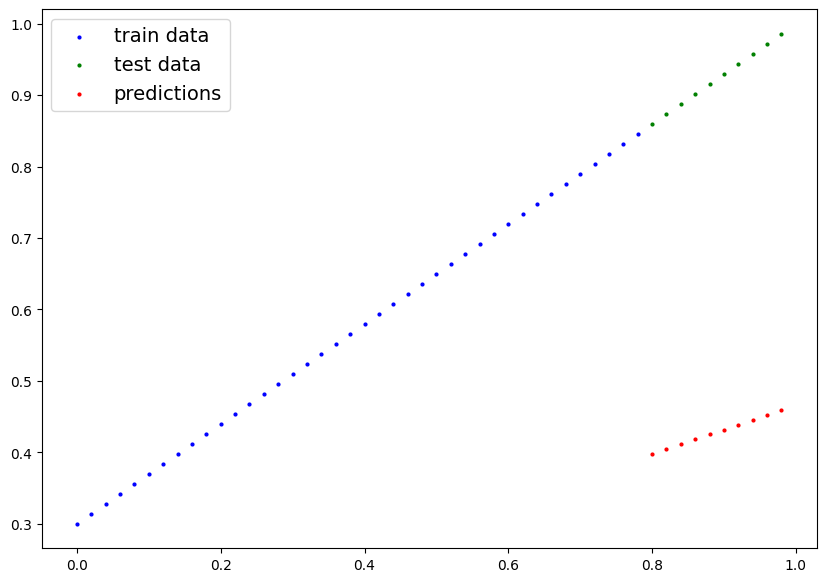

In [24]:
plot_predictions(predictions=y_preds)

### train model:for a model to move from unknown to some known perameter.
 use loss functions to show how poor or how wrong the prediction are. (lower is better)
 * things we need to train:
1. loss function:how poor or how wrong the prediction are
2. optimizer: takes into account the loss of a model and adjusts the model's parameter
 * in pytorch we need:
1. a training loop
2. a testing loop



In [34]:
#set up loss functions
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

### building training loop and a testing loop in pytorch

* things we need in a training loop:
0. loop through the data
1. forward pass
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backwards through the network to calculate the gradients of each of tne parameters of our model with respect to the loss
5. optimizer step - use the optimizer to adjust model's parameters to try and improve the loss

In [35]:
torch.manual_seed(42)
epochs = 10

for epochs in range(epochs):
  model_0.train() #set model to training model
  y_preds = model_0(X_train) #forward pass
  loss = loss_fn(y_preds,Y_train) #calculate loss
  optimizer.zero_grad()
  loss.backward() #proform backpropagation
  optimizer.step() #use the optimizer to adjust model's parameters to try and improve the loss
  model_0.eval() #turn off gradient tracking
  if epochs%1==0:
    print(model_0.state_dict())
    print(f"loss:{loss}")

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3083]))])
loss:0.008932482451200485
OrderedDict([('weights', tensor([0.6983])), ('bias', tensor([0.3073]))])
loss:0.007780400104820728
OrderedDict([('weights', tensor([0.6979])), ('bias', tensor([0.3063]))])
loss:0.006628311239182949
OrderedDict([('weights', tensor([0.6975])), ('bias', tensor([0.3053]))])
loss:0.005476228892803192
OrderedDict([('weights', tensor([0.6971])), ('bias', tensor([0.3043]))])
loss:0.004324139561504126
OrderedDict([('weights', tensor([0.6967])), ('bias', tensor([0.3033]))])
loss:0.003172061638906598
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3023]))])
loss:0.002019981388002634
OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3017]))])
loss:0.0009942218894138932
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3016]))])
loss:0.0007778831059113145
OrderedDict([('weights', tensor([0.6965])), ('bias', tensor([0.3015]))])
loss:0.0007392846164293587


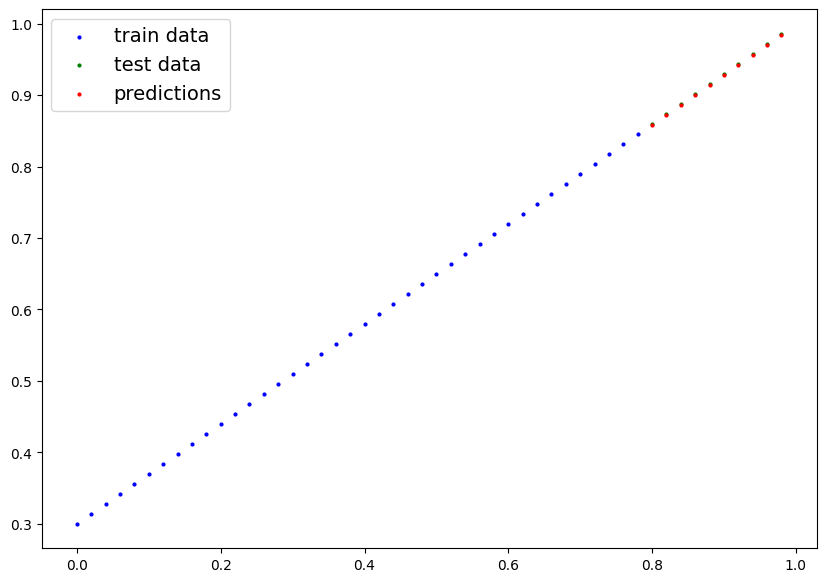

In [36]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)